In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline

# Reading the Trip_Data and Trip_Fare

In [2]:
data = pd.read_csv('trip_data_4/trip_data_4.csv') #original data 15mil lines (chunksize an option to load large data) 

C:\Users\ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_short = pd.read_csv('trip_data_4/trip_data_4.csv', nrows= 1000000) #file with 1000000 lines

In [4]:
fare = pd.read_csv('trip_fare_4/trip_fare_4.csv')

In [5]:
fare_short  = pd.read_csv('trip_fare_4/trip_fare_4.csv', nrows = 1000000) 

In [6]:
data_short.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
medallion              1000000 non-null object
 hack_license          1000000 non-null object
 vendor_id             1000000 non-null object
 rate_code             1000000 non-null int64
 store_and_fwd_flag    447554 non-null object
 pickup_datetime       1000000 non-null object
 dropoff_datetime      1000000 non-null object
 passenger_count       1000000 non-null int64
 trip_time_in_secs     1000000 non-null int64
 trip_distance         1000000 non-null float64
 pickup_longitude      1000000 non-null float64
 pickup_latitude       1000000 non-null float64
 dropoff_longitude     1000000 non-null float64
 dropoff_latitude      1000000 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 106.8+ MB


In [95]:
data_short.isnull().sum()

medallion                   0
 hack_license               0
 vendor_id                  0
 rate_code                  0
 store_and_fwd_flag    549413
 pickup_datetime            0
 dropoff_datetime           0
 passenger_count            0
 trip_time_in_secs          0
 trip_distance              0
 pickup_longitude           0
 pickup_latitude            0
 dropoff_longitude          0
 dropoff_latitude           0
date                        0
day                         0
hour                        0
pickup_coord                0
coord_trip                  0
fare                        0
day_num                     0
minute                      0
second                      0
tip                         0
VTS                         0
dtype: int64

In [7]:
data_short.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [8]:
fare_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
medallion           1000000 non-null object
 hack_license       1000000 non-null object
 vendor_id          1000000 non-null object
 pickup_datetime    1000000 non-null object
 payment_type       1000000 non-null object
 fare_amount        1000000 non-null float64
 surcharge          1000000 non-null float64
 mta_tax            1000000 non-null float64
 tip_amount         1000000 non-null float64
 tolls_amount       1000000 non-null float64
 total_amount       1000000 non-null float64
dtypes: float64(6), object(5)
memory usage: 83.9+ MB


In [96]:
fare_short.isnull().sum()

medallion             0
 hack_license         0
 vendor_id            0
 pickup_datetime      0
 payment_type         0
 fare_amount          0
 surcharge            0
 mta_tax              0
 tip_amount           0
 tolls_amount         0
 total_amount         0
day                   0
 trip_time_in_secs    0
dtype: int64

In [9]:
fare_short.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20


# Adding date features using pd.to_datetime()

In [10]:
data_short[' pickup_datetime'] = pd.to_datetime(data_short[' pickup_datetime'])

In [11]:
data_short['date'] = data_short[' pickup_datetime'].apply(lambda x: x.date()) #get the entire date

In [12]:
data_short['day'] = data_short[' pickup_datetime'].apply(lambda x: x.day_name()[:3]) #get name of day (Mon, Tue,...)

In [13]:
data_short['hour'] = data_short[' pickup_datetime'].apply(lambda x: x.hour)

In [14]:
fare_short[' pickup_datetime'] = pd.to_datetime(fare_short[' pickup_datetime'])

In [15]:
fare_short['day'] = fare_short[' pickup_datetime'].apply(lambda x: x.day_name()[:3])

# Distribution of Number of Passengers

In [16]:
data_short[' passenger_count'].value_counts()

1    685411
2    136506
5     66423
3     44837
6     44476
4     22345
0         2
Name:  passenger_count, dtype: int64

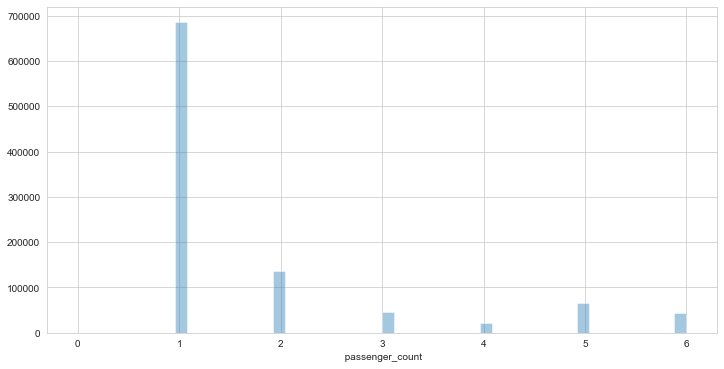

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.distplot(data_short[' passenger_count'], kde=False)

Distrubution shows maximum travelling passengers to be 1. Passenger_count of 5 and 6 indicate bigger taxis or possibilty of adults and a small child.
Intrestingly passenger_count of 4 has the least count in the graph lower than 5 and 6, maybe due to use of private car preffered for family or group 4.

# Distribution of Payment Type

In [19]:
fare_short[' payment_type'].value_counts()

CRD    516313
CSH    480679
NOC      2057
DIS       691
UNK       260
Name:  payment_type, dtype: int64

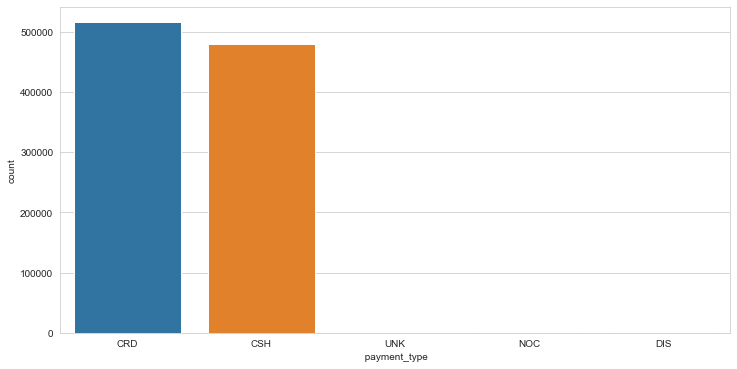

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(fare_short[' payment_type'])

Distribution shows the credit card to be most widely used mode of payment followed by cash. These are predominantly the most common modes of payment compared to NOC, UNK and DIS being used on few instances.

# Distribution of Fare Amount

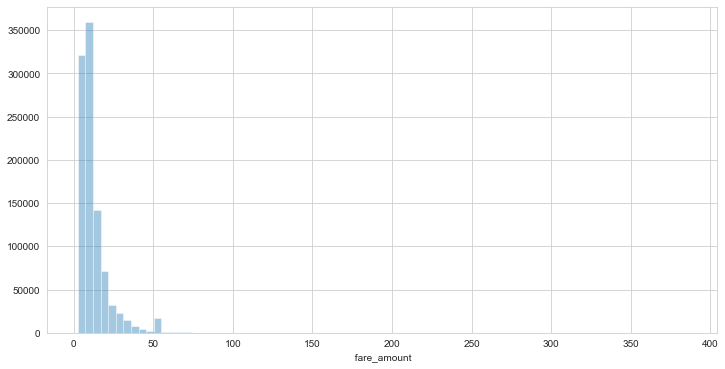

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' fare_amount'], kde= False,bins=80)

In [22]:
fare_short[' fare_amount'].value_counts().head()

6.5    50492
6.0    50397
7.0    49758
5.5    48369
7.5    47715
Name:  fare_amount, dtype: int64

The distribution indicates that the passengers prefer using the cab for smaller amounts in range of 6-9. There is a decrease in the number of as the fare increases but a small increase in number at fare of 50. 

# Distribution of Tip Amount

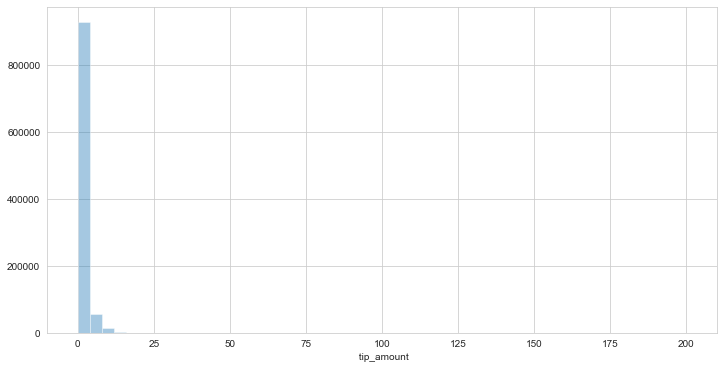

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' tip_amount'], kde= False)

In [24]:
fare_short[' tip_amount'].value_counts().head()

0.0    499874
1.0     88794
2.0     46780
1.5     37342
3.0     15860
Name:  tip_amount, dtype: int64

Most passengesr do not tip the with 0.0 being the most common tip_amount. 

# Distrbution of Total Amount

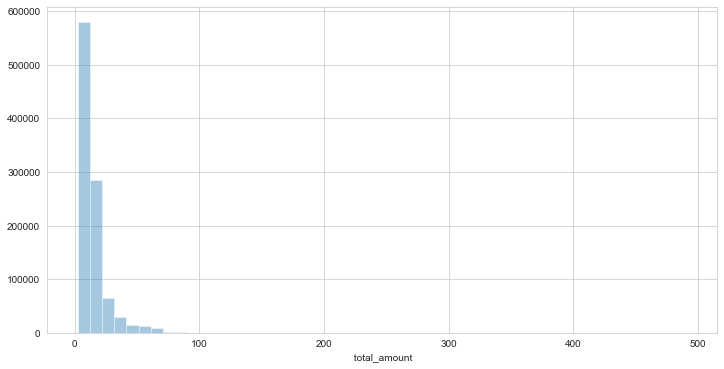

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' total_amount'],kde=False)

Total amount similar to fare_amount max in the early range as people prefer using cab for shorter distances.

In [27]:
fare_short[' total_amount'].value_counts().head()

6.5    35838
9.0    35651
8.0    34588
7.0    34188
7.5    33647
Name:  total_amount, dtype: int64

# EDA

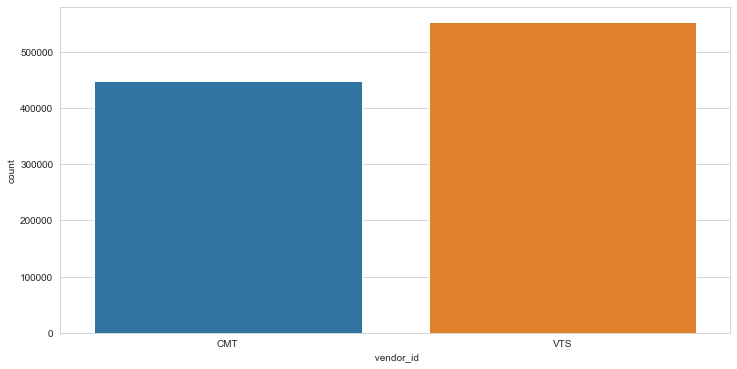

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data_short[' vendor_id'])

In [29]:
data_week = data_short.groupby('day')[' trip_time_in_secs'].aggregate(np.median).reset_index()

In [30]:
data_week

,day,trip_time_in_secs
0,Fri,656
1,Mon,604
2,Sat,600
3,Sun,561
4,Thu,654
5,Tue,599
6,Wed,616


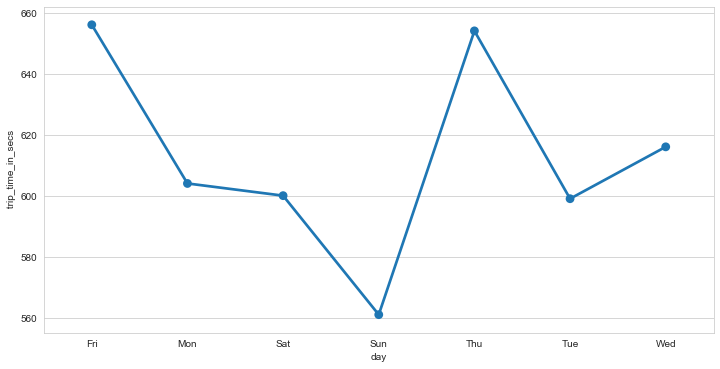

In [31]:
plt.figure(figsize=(12,6))
sns.pointplot(data_week['day'], data_week[' trip_time_in_secs'])

The duration of the trips as per the day of the week are maximum at Friday, Thurday and wednesday, with the least duration on sunday.

In [32]:
data_hour = data_short.groupby('hour')[' trip_time_in_secs'].aggregate(np.median).reset_index()

In [33]:
data_hour

,hour,trip_time_in_secs
0,0,600
1,1,600
2,2,568
3,3,544
4,4,589
5,5,540
6,6,480
7,7,515
8,8,552
9,9,540


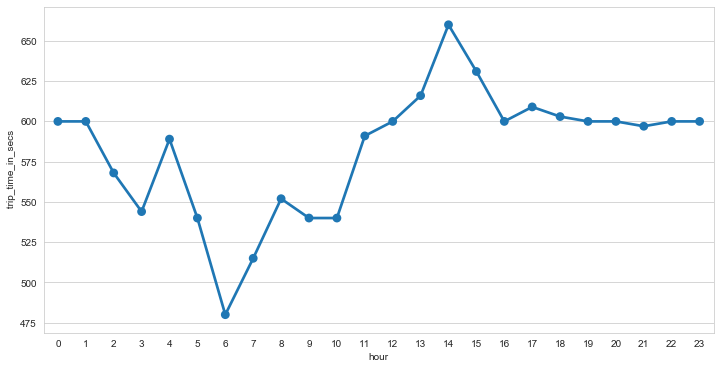

In [34]:
plt.figure(figsize=(12,6))
sns.pointplot(data_hour['hour'], data_hour[' trip_time_in_secs'])

The trip duration as per the hours of the days indicate a steady increase in duration from 10am to maximum at 2 pm with a decrease and a constant duration from 4pm to 11pm. The smalled duration is seen at 6am.

# 5 Bussiest Hours of the day

Feature engineering on original data dataset to find correct output , short data gives differebt output.

In [35]:
data[' pickup_datetime'] = pd.to_datetime(data[' pickup_datetime']) 

In [36]:
data['Date'] = data[' pickup_datetime'].apply(lambda x: x.date())

In [37]:
data['Hour'] = data[' pickup_datetime'].apply(lambda x: x.hour)

In [38]:
data_new = data.groupby(by=['Date','Hour']).count()[' vendor_id'].unstack() #create Date with date as index and hour as column

In [39]:
data_new.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,9087,5280,3377,2309,2667,4489,11080,19017,23611,23859,...,21736,22214,21739,25907,28795,28183,27550,26672,23057,16127
2013-04-02,11157,6281,3717,2470,2558,4321,11905,22513,27530,27400,...,25874,25298,21321,26388,33436,33920,33126,31328,27626,21305
2013-04-03,13772,7799,4768,3106,2855,4279,12402,24473,28862,28038,...,25989,24919,19847,24423,31639,34328,33901,33169,31414,24446
2013-04-04,15713,8996,5502,3515,3272,4490,12854,24936,29395,28080,...,26423,25079,20175,25729,32816,34612,34575,33849,32857,28834
2013-04-05,21712,14025,9163,6234,4793,4954,12457,23395,29155,27881,...,26003,23923,19446,24516,32048,35655,35525,34607,35749,35521


Heatmap to show bussiest hours

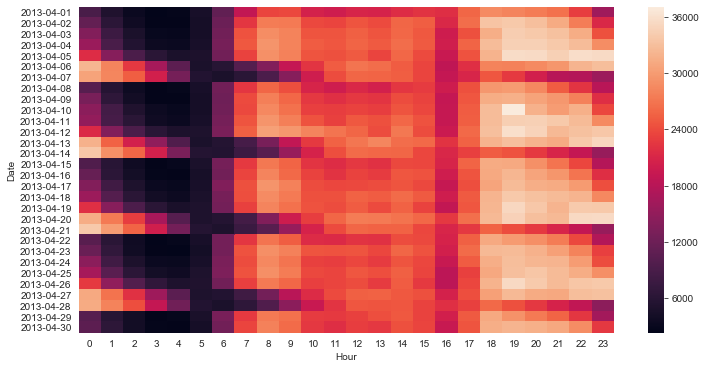

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(data_new)

The heatmap indiactes the most trips happening in between 6pm and 10pm. On sundays and mondays the trips increase in early hours of the day, mostly people returning from a late night out and reduce in between 6am to 10am on these days compared to week days(office hour). 

In [41]:
data_new.iloc[0].nlargest() 

Hour
18    28795
19    28183
20    27550
21    26672
17    25907
Name: 2013-04-01, dtype: int64

In [42]:
counts = {}
for i in range(0,30):
    hours = data_new.iloc[i].nlargest()
    for j in hours.index:
        counts[j] = counts.get(j,0)+1   #checking frequency of the top 5 hours in the forthe month 

In [43]:
dict(sorted(counts.items(), key=operator.itemgetter(1), reverse=True)[:5])

{20: 26, 19: 25, 18: 24, 21: 20, 22: 19}

The 5 bussiest hourrs are 20,19,18,21 and 22. This can be conofirmed by looking at the heatmap which shows considerable trips in this period.

# Top 10 Bussiest Locations

In [44]:
list_coord =[]
for i in range(0,1000000):
    list_coord.append((round(data_short[' pickup_longitude'].iloc[i],2) , round(data_short[' pickup_latitude'].iloc[i],2)))
    #rounding to 2 places to create a cluster of locations which are realtively close to one another.

In [45]:
data_short['pickup_coord'] = list_coord #feature which has the pickup lat and long

In [46]:
data_short['pickup_coord'].value_counts().head(10) #top 10 occuring pickup co-ordinates

(-73.97, 40.76)    53549
(-73.99, 40.75)    52849
(-73.98, 40.76)    46498
(-73.98, 40.75)    45621
(-73.99, 40.76)    45107
(-73.99, 40.74)    44018
(-73.99, 40.73)    39857
(-74.0, 40.73)     35168
(-74.0, 40.74)     33195
(-73.98, 40.74)    31009
Name: pickup_coord, dtype: int64

# Mapping the top co-ordinates using Folium

In [47]:
import folium

In [48]:
m= folium.Map(location=[40.712776,-74.005974], zoom_start=13) #co-ordinates for NEW YORK 

In [49]:
folium.Marker(location=[40.76,-73.97]).add_to(m)
folium.Marker(location=[40.75,-73.99]).add_to(m)
folium.Marker(location=[40.76, -73.98]).add_to(m)
folium.Marker(location=[40.75,-73.98]).add_to(m)
folium.Marker(location=[40.76, -73.99]).add_to(m)
folium.Marker(location=[40.74,-73.99]).add_to(m)
folium.Marker(location=[40.73,-73.99]).add_to(m)
folium.Marker(location=[40.73,-74.0]).add_to(m)
folium.Marker(location=[40.74,-74.0]).add_to(m)
folium.Marker(location=[40.74,-73.98]).add_to(m)
m

# Trip with most consistent fare

In [50]:
lst =[]
for i in range(0,1000000):
    lst.append((round(data_short[' pickup_longitude'].iloc[i],2), round(data_short[' pickup_latitude'].iloc[i],2), round(data_short[' dropoff_longitude'].iloc[i],2), round(data_short[' dropoff_latitude'].iloc[i],2)))
    

In [51]:
data_short['coord_trip'] = lst  # co-ordinates for both pickup and drop 

In [52]:
data_short['fare'] = fare_short[' fare_amount']

In [53]:
std = data_short.groupby('coord_trip')['fare']

In [54]:
std.std().dropna().sort_values().head() #finding the co-ordinates which have the least std with respect to the fare

coord_trip
(-73.79, 40.64, -73.96, 40.79)    0.0
(-73.78, 40.65, -73.93, 40.87)    0.0
(-73.96, 40.72, -73.89, 40.76)    0.0
(-73.78, 40.65, -73.93, 40.86)    0.0
(-73.96, 40.72, -73.9, 40.77)     0.0
Name: fare, dtype: float64

# Average wage of taxi driver

In [55]:
data_avg = fare_short.groupby(' hack_license')[' total_amount'].mean().reset_index()

In [56]:
data_avg[' total_amount'].mean()

15.402042824020144

__1.As a driver target the busy hours from 18-23 for maximum pickups. 2.Target  the 11am to 2pm range for long duration trips especially on fridays,thurdays and wednesdays. 3.Stay close to the top busiest locations in the city.__

# On friday hour-0 locations with max pickups from

In [58]:
data_short[(data_short['day']== 'Fri') & (data_short['hour']==0)]['pickup_coord'].value_counts().head()

(-74.0, 40.73)     251
(-73.99, 40.72)    219
(-73.99, 40.73)    218
(-73.99, 40.76)    217
(-73.99, 40.74)    209
Name: pickup_coord, dtype: int64

# Function for top locations for pickup at the given day and hour

In [59]:
def busy_location(day,hour):
    busy_loc = data_short[(data_short['day']== day) & (data_short['hour']==hour)]['pickup_coord'].value_counts().head()
    x = folium.Map(location=[40.712776,-74.005974], zoom_start=13)
    for k,v in busy_loc.index:
        folium.Marker(location=[v,k]).add_to(x)
    return x

In [60]:
busy_location('Fri',0)

# Model to predict fare_amount

In [61]:
data_short['day_num'] = data_short[' pickup_datetime'].apply(lambda x: x.dayofweek)

In [62]:
data_short['minute'] = data_short[' pickup_datetime'].apply(lambda x: x.minute)
data_short['second'] = data_short[' pickup_datetime'].apply(lambda x: x.second)

In [63]:
data_short['fare'] = fare_short[' fare_amount']

In [64]:
data_short['tip'] = fare_short[' tip_amount']

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

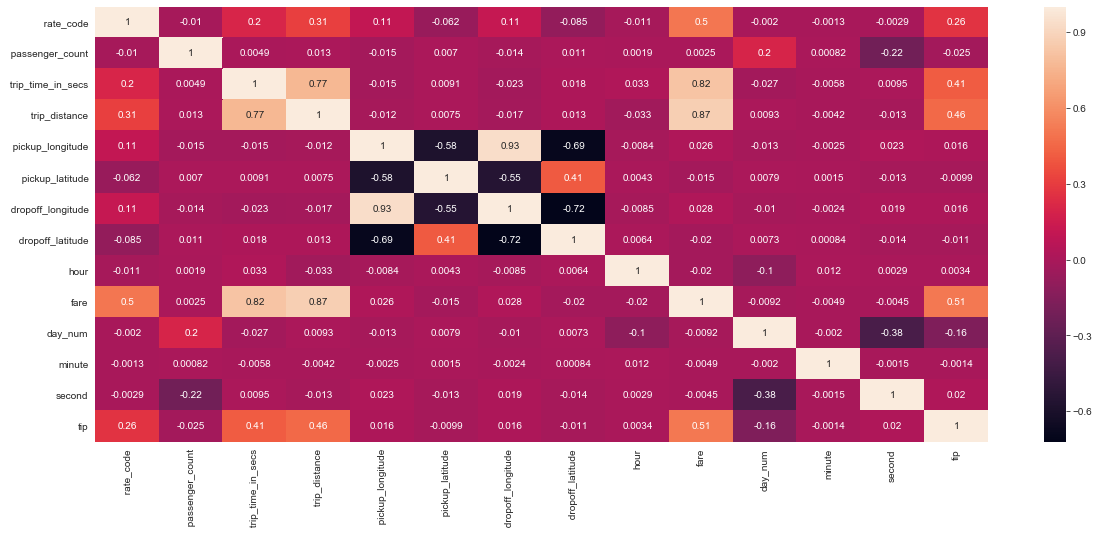

In [65]:
plt.figure(figsize=(20,8))
sns.heatmap(data_short.corr(), annot=True)
plt.tight_layout

The main features affecting the fare_amount seems to be trip_time_in_secs, trip_distance and rate_code  

# Outliers

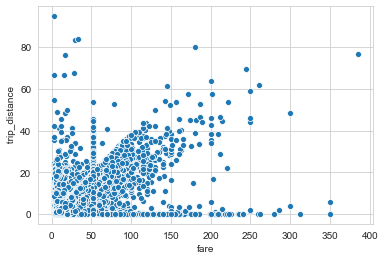

In [66]:
sns.scatterplot(x='fare', y=' trip_distance', data= data_short)

Between the fare and trip_distance there seems instances where the trip_distnace is close to zero and fare still increases, these values would cause errors in our model especially in mean squared error

In [67]:
i = data_short[(data_short[' trip_distance']==0) & (data_short['fare']>0)].index # no travel and still fare logged 

In [68]:
data_short.drop(i,inplace=True) # dropping values where trip distance is zero and fare is still greater than zero 

In [69]:
i = data_short[(data_short[' trip_distance']>0) & (data_short['fare']==0)].index #free rides

In [70]:
data_short.drop(i,inplace=True)

Targeting the 100+ fare region for distance below 5 km 

In [71]:
i = data_short[(data_short[' trip_distance']<5) & (data_short['fare']>100)].index 

In [72]:
data_short.drop(i,inplace=True)

Targeting the fare less then 0- 50 fare  and travelling 40 plus kiloometers

In [73]:
i = data_short[(data_short[' trip_distance']>40) & (data_short['fare']<50)].index 

In [74]:
data_short.drop(i,inplace=True)

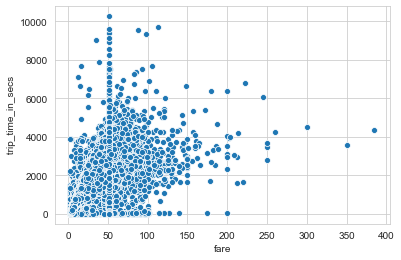

In [75]:
sns.scatterplot(x='fare', y=' trip_time_in_secs', data= data_short)

In [76]:
i =data_short[(data_short[' trip_time_in_secs'] == 0) & (data_short['fare']>0)].index

In [77]:
data_short.drop(i,inplace=True)

Free Rides

In [78]:
i =data_short[(data_short[' trip_time_in_secs']>0) & (data_short['fare']==0)].index 

In [79]:
data_short.drop(i,inplace=True)

For 5 min journey the fare that is greater than 100 

In [80]:
i =data_short[(data_short[' trip_time_in_secs'] < 300) & (data_short['fare']>100)].index 

In [81]:
data_short.drop(i,inplace=True)

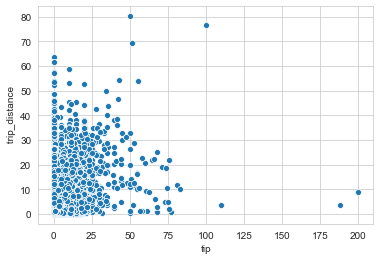

In [82]:
sns.scatterplot(x='tip', y=' trip_distance', data= data_short)

In [ ]:
i =data_short[data_short['tip']>100].index
data_short.drop(i,inplace=True)

Adding feature VTS using get_dummies as vendor_id which has a good correlation with fare

In [83]:
data_short[' vendor_id'].value_counts()

VTS    549411
CMT    441150
Name:  vendor_id, dtype: int64

In [84]:
vendor = pd.get_dummies(data_short[' vendor_id'], drop_first=True)

In [85]:
data_short = pd.concat([data_short, vendor], axis=1)

#  Random Forest

In [86]:
X = data_short[[' pickup_longitude',' pickup_latitude','hour','minute','day_num','VTS',' trip_time_in_secs',' trip_distance',' rate_code']]
y= data_short['fare']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model = RandomForestRegressor()

In [91]:
model.fit(X_train,y_train)

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [92]:
predictions = model.predict(X_test)

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.44026834225642647
MSE: 1.7900544903371483
RMSE: 1.33792917986609
